<h1>1. Loading data and selecting desired columns</h1>
<h2>1.1. Selecting Desired Columns:</h2>
<p>
    <ol>
        <li>COST_RATE</li>
        <li>PARTY_ID</li>
        <li>POD_ID</li>
        <li>ETD_POL_D</li>
        <li>CNTR_SIZE</li>
        <li>CNTR_TYPE</li>
    </ol>
</p>

In [21]:
import math  # for rounding up values
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime  # for strptime
import datetime
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
from seaborn import heatmap
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 4000

# df = pd.ExcelFile('CR_COST_1.xlsx').parse()
df = pd.read_csv('CR_COST_test.csv', converters={
                 'PARTY_ID': str, 'PORT_ID': str, 'ETD_POL_D': str, 'CNTR_TYPE': str})

# Selecting columns needed
sel_df = ["COST_RATE", "PARTY_ID", "POD_ID",
          "ETD_POL_D", "CNTR_SIZE", "CNTR_TYPE","COST_QTY"]
pod_vs_cost = ["COST_RATE", "POD_ID"]
df2 = df[sel_df]
print(len(df2))
df2.head()

# Showing the data type for each columns
df2.info()

111440


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE,COST_QTY
0,850,010019363,FRLEH,24/08/2020,40.0,HC NOR,1
1,110,01005728,CNYTN,25/08/2020,20.0,GP,1
2,"1,850",01001591,MTMAR,25/08/2020,40.0,HC,1
3,"1,041",010019364,FRFOS,25/08/2020,40.0,HC,1
4,200,01008827,CNNGB,22/08/2020,40.0,HC,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111440 entries, 0 to 111439
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   COST_RATE  111439 non-null  object 
 1   PARTY_ID   111440 non-null  object 
 2   POD_ID     111440 non-null  object 
 3   ETD_POL_D  111440 non-null  object 
 4   CNTR_SIZE  110685 non-null  float64
 5   CNTR_TYPE  111440 non-null  object 
 6   COST_QTY   111440 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 6.0+ MB


In [22]:
# Original Dataframe
df.head()


,COM_ID,CSL_ID,CNTR_ID,COST_C,COST_DESC,COST_RATE,COST_UNIT,COST_QTY,COST_TERM,PARTY_ID,...,COST_EX_RATE,LOC_AMT,DOC_AMT,POL_ID,POD_ID,VESSEL,ETD_POL_D,ETA_POD_D,CNTR_SIZE,CNTR_TYPE
0,10,ECS010200700675,CTNR010200800805,OF-E-CT-CR,OCEAN FREIGHT,850,CNTR,1,FC,010019363,...,1,"1,178",850,SGSIN,FRLEH,NYK OCEANUS,24/08/2020,19/09/2020,40.0,HC NOR
1,10,ECS010200700090,CTNR010200800652,OF-E-CT-CR,OCEAN FREIGHT,110,CNTR,1,FP,01005728,...,1,151,110,SGSIN,CNYTN,COSCO SHIPPING GALAXY,25/08/2020,30/08/2020,20.0,GP
2,10,ECS010200700568,CTNR010200800466,OF-E-CT-CR,OCEAN FREIGHT,"1,850",CNTR,1,FP,01001591,...,1,"2,563","1,850",SGSIN,MTMAR,CMA CGM LEO,25/08/2020,09/09/2020,40.0,HC
3,10,ECS010200800484,CTNR010200800789,OF-E-CT-CR,OCEAN FREIGHT,"1,041",CNTR,1,FC,010019364,...,1,"1,442","1,041",SGSIN,FRFOS,CMA CGM LEO,25/08/2020,15/09/2020,40.0,HC
4,10,ECS010200700582,CTNR010200800470,OF-E-CT-CR,OCEAN FREIGHT,200,CNTR,1,FP,01008827,...,1,277,200,SGSIN,CNNGB,YM WEALTH,22/08/2020,31/08/2020,40.0,HC


<h1>2. Visualising raw data, uncleaned and sorted.</h1>

In [23]:
# Finding how many different vendors are there
def get_unique_num(column):
    list_of_unique_numbers = []
    unique_numbers = set(column)
    for column in unique_numbers:
        list_of_unique_numbers.append(column)
    return list_of_unique_numbers


# Counting how many uniques
vendors_1 = get_unique_num(df2["PARTY_ID"])
cntr_type_1 = get_unique_num(df2["CNTR_TYPE"])
cntr_size_1 = get_unique_num(df2["CNTR_SIZE"])
port_1 = get_unique_num(df2["POD_ID"])

print("There are a total of " + str(len(vendors_1)) + " vendors.")
print("There are a total of " + str(len(cntr_type_1)) + " container types..")
print("There are a total of " + str(len(cntr_size_1)) + " container sizes.")
print("There are a total of " + str(len(port_1)) +
      " ports the company do business in.")


There are a total of 334 vendors.
There are a total of 15 container types..
There are a total of 758 container sizes.
There are a total of 220 ports the company do business in.


<h2>2.1. Cleaning Data - Removing all NaN data</h2>

In [24]:
df2.isnull().sum().sort_values(ascending=False)/df.shape[0]

CNTR_SIZE    0.006775
COST_RATE    0.000009
PARTY_ID     0.000000
POD_ID       0.000000
ETD_POL_D    0.000000
CNTR_TYPE    0.000000
COST_QTY     0.000000
dtype: float64

In [25]:
df3 = df2.dropna()
print("Total of " + str(len(df3)) + " rows left after removing rows contain NaN.")
df3.head()

# Counting how many uniques
vendors_2 = get_unique_num(df3["PARTY_ID"])
cntr_type_2 = get_unique_num(df3["CNTR_TYPE"])
cntr_size_2 = get_unique_num(df3["CNTR_SIZE"])
port_2 = get_unique_num(df3["POD_ID"])

print("There are a total of " + str(len(vendors_1)) + " vendors.")
print("There are a total of " + str(len(cntr_type_1)) + " container types..")
print("There are a total of " + str(len(cntr_size_1)) + " container sizes.")
print("There are a total of " + str(len(port_1)) +
      " ports the company do business in.")


Total of 110684 rows left after removing rows contain NaN.


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE,COST_QTY
0,850,010019363,FRLEH,24/08/2020,40.0,HC NOR,1
1,110,01005728,CNYTN,25/08/2020,20.0,GP,1
2,"1,850",01001591,MTMAR,25/08/2020,40.0,HC,1
3,"1,041",010019364,FRFOS,25/08/2020,40.0,HC,1
4,200,01008827,CNNGB,22/08/2020,40.0,HC,1


There are a total of 334 vendors.
There are a total of 15 container types..
There are a total of 758 container sizes.
There are a total of 220 ports the company do business in.


<h2>2.2. Cleaning Data - Columns</h2>

<h3>2.2.1. Cleaning and formating "COST_RATE"</h3>
<p>
    <ol>
        <li>Removing commas in cost rate</li>
        <li>Changing data type from object to float</li>
        <li>Removing negative data values</li>
    </ol>
</p>

In [26]:
# Remove commas from dataframe
df3.COST_RATE = df3.COST_RATE.apply(lambda x: x.replace(',', ''))

# Converting cost rate column to float
df3['COST_RATE'] = df3['COST_RATE'].map(lambda x: float(x))
df3.head()
df3.info()

# Remove negative values
df3 = df3.drop(df3.index[df3['COST_RATE'] < 0])

# Visualising Data
print("\n")
print("Total of " + str(len(df3)) +
      " rows left after removing rows contain negative cost values.")
df3.head()


C:\Users\it1\AppData\Local\Temp\ipykernel_25296\1895982260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.COST_RATE = df3.COST_RATE.apply(lambda x: x.replace(',', ''))
C:\Users\it1\AppData\Local\Temp\ipykernel_25296\1895982260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['COST_RATE'] = df3['COST_RATE'].map(lambda x: float(x))


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE,COST_QTY
0,850.0,010019363,FRLEH,24/08/2020,40.0,HC NOR,1
1,110.0,01005728,CNYTN,25/08/2020,20.0,GP,1
2,1850.0,01001591,MTMAR,25/08/2020,40.0,HC,1
3,1041.0,010019364,FRFOS,25/08/2020,40.0,HC,1
4,200.0,01008827,CNNGB,22/08/2020,40.0,HC,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110684 entries, 0 to 111439
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   COST_RATE  110684 non-null  float64
 1   PARTY_ID   110684 non-null  object 
 2   POD_ID     110684 non-null  object 
 3   ETD_POL_D  110684 non-null  object 
 4   CNTR_SIZE  110684 non-null  float64
 5   CNTR_TYPE  110684 non-null  object 
 6   COST_QTY   110684 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 6.8+ MB


Total of 108465 rows left after removing rows contain negative cost values.


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE,COST_QTY
0,850.0,010019363,FRLEH,24/08/2020,40.0,HC NOR,1
1,110.0,01005728,CNYTN,25/08/2020,20.0,GP,1
2,1850.0,01001591,MTMAR,25/08/2020,40.0,HC,1
3,1041.0,010019364,FRFOS,25/08/2020,40.0,HC,1
4,200.0,01008827,CNNGB,22/08/2020,40.0,HC,1


<h3>2.2.2. Cleaning Data - Container Size</h3>
<p>
    <ol>
        <li>Changing datatype from float to integer</li>
    </ol>
</p>

In [27]:
# Convert float to integer
df3['CNTR_SIZE'] = df3['CNTR_SIZE'].astype(int)

# Visualising on table and show data types
df3.head()
df3.info()


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE,COST_QTY
0,850.0,010019363,FRLEH,24/08/2020,40,HC NOR,1
1,110.0,01005728,CNYTN,25/08/2020,20,GP,1
2,1850.0,01001591,MTMAR,25/08/2020,40,HC,1
3,1041.0,010019364,FRFOS,25/08/2020,40,HC,1
4,200.0,01008827,CNNGB,22/08/2020,40,HC,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 108465 entries, 0 to 111439
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   COST_RATE  108465 non-null  float64
 1   PARTY_ID   108465 non-null  object 
 2   POD_ID     108465 non-null  object 
 3   ETD_POL_D  108465 non-null  object 
 4   CNTR_SIZE  108465 non-null  int32  
 5   CNTR_TYPE  108465 non-null  object 
 6   COST_QTY   108465 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 6.2+ MB


<h3>2.2.3. Cleaning Data - Shipping Date</h3>
<p>
    <ol>
        <li>Changing from string to python date format</li>
    </ol>
</p>

In [28]:
# Changing column ETD_POL_D from string to date format day/month/year
df3['ETD_POL_D'] = pd.to_datetime(df3['ETD_POL_D'], errors='coerce')

for col in ['PARTY_ID', 'POD_ID','CNTR_TYPE']:
    df3[col] = df3[col].astype(str)
df3.head()
df3.info()

# Exporting it as new dataframe
df3.to_csv("CR_COST_1.csv", index=False)


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE,COST_QTY
0,850.0,010019363,FRLEH,2020-08-24,40,HC NOR,1
1,110.0,01005728,CNYTN,2020-08-25,20,GP,1
2,1850.0,01001591,MTMAR,2020-08-25,40,HC,1
3,1041.0,010019364,FRFOS,2020-08-25,40,HC,1
4,200.0,01008827,CNNGB,2020-08-22,40,HC,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 108465 entries, 0 to 111439
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   COST_RATE  108465 non-null  float64       
 1   PARTY_ID   108465 non-null  object        
 2   POD_ID     108465 non-null  object        
 3   ETD_POL_D  108464 non-null  datetime64[ns]
 4   CNTR_SIZE  108465 non-null  int32         
 5   CNTR_TYPE  108465 non-null  object        
 6   COST_QTY   108465 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 6.2+ MB


<h2>2.3. Cleaning Data - Conclusion for data cleaning</h2>


In [29]:
print(print("Total of " + str(len(df3)) + " rows left cleaning data.\n"))

# Counting how many uniques
vendors_3 = get_unique_num(df3["PARTY_ID"])
cntr_type_3 = get_unique_num(df3["CNTR_TYPE"])
cntr_size_3 = get_unique_num(df3["CNTR_SIZE"])
port_3 = get_unique_num(df3["POD_ID"])

print("There are a total of " + str(len(vendors_3)) + " vendors.")
print("There are a total of " + str(len(cntr_type_3)) + " container types..")
print("There are a total of " + str(len(cntr_size_3)) + " container sizes.")
print("There are a total of " + str(len(port_3)) +
      " ports the company do business in.\n")

df3.info()


Total of 108465 rows left cleaning data.

None
There are a total of 332 vendors.
There are a total of 14 container types..
There are a total of 3 container sizes.
There are a total of 218 ports the company do business in.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108465 entries, 0 to 111439
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   COST_RATE  108465 non-null  float64       
 1   PARTY_ID   108465 non-null  object        
 2   POD_ID     108465 non-null  object        
 3   ETD_POL_D  108464 non-null  datetime64[ns]
 4   CNTR_SIZE  108465 non-null  int32         
 5   CNTR_TYPE  108465 non-null  object        
 6   COST_QTY   108465 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 6.2+ MB


<h1>3. Visualising with clean data</h1>

<h2>3.1. Visualising the volume and frequency of customers on which port. </h2>
<p>Visualising with: </p>
<p>X-axis - Date</p>
<p>Y-axis - Country Port</p>

In [30]:
# View which is the most popular port using numpy
port_id, port_count = np.unique(df3["POD_ID"], return_counts=True)
count_sort_ind = np.argsort(-port_count)
print(list(zip(port_id[count_sort_ind], port_count[count_sort_ind])))
print(len(port_id))


[('AEDXB', 3444), ('THBKK', 3256), ('NZAKL', 2752), ('VNCLI', 2531), ('KRPUS', 2333), ('CNSHA', 2223), ('IDJKT', 2033), ('INNSA', 1905), ('INMAA', 1873), ('HKHKG', 1845), ('PHMNN', 1800), ('BRSSZ', 1707), ('AUSYD', 1655), ('AUMEL', 1638), ('MYPKG', 1624), ('BDCGP', 1488), ('THLCH', 1430), ('AUFRE', 1421), ('LKCMB', 1404), ('MUPLU', 1372), ('VNHPH', 1360), ('CNTXG', 1282), ('PKKHI', 1224), ('ZADUR', 1208), ('ARBUE', 1188), ('GBFXT', 1166), ('ILASH', 1135), ('AUBNE', 1125), ('ESBCN', 1097), ('EGALY', 1089), ('TWKEL', 1070), ('FIHEL', 1059), ('CLVAP', 1039), ('SEGOT', 1014), ('DEHAM', 1014), ('BRRIO', 1012), ('IEDUB', 1003), ('NZLYT', 993), ('NOOSL', 978), ('TRIST', 974), ('UYMVD', 967), ('GRPIR', 955), ('MYPGU', 919), ('CNTAO', 903), ('IDSUB', 888), ('FRLEH', 860), ('MXZLO', 859), ('CYLMS', 852), ('ITGOA', 814), ('CZPRG', 809), ('NLRTM', 802), ('IDSRG', 785), ('PHCEB', 779), ('AUADL', 777), ('BRRIG', 765), ('INCCU', 751), ('BRPNG', 751), ('MMAWT', 749), ('TWKHH', 701), ('FJSUV', 699), ('

In [31]:
min_date = df3['ETD_POL_D'].min()
max_date = df3['ETD_POL_D'].max()
df4 = df3.sort_values(
    by="ETD_POL_D",
    ascending=False,
    kind='mergesort'
)
print(min_date, max_date)

print("Before: " + str(len(df4)))
year_range1 = df4.ETD_POL_D.dt.strftime('%Y').unique()
print(year_range1, "\n")

# Spotted an NAN in dates, so proceed to remove it
df5 = df4.dropna()
print("After: " + str(len(df4)))
year_range2 = df5.ETD_POL_D.dt.strftime('%Y').unique()
print(year_range2, "\n")

print("The max year is " + year_range2.max())
print("The min year is " + year_range2.min())
print("There is " + str(len(df5)) + " rows now.")


2002-01-17 00:00:00 2022-12-11 00:00:00
Before: 108465
['2022' '2021' '2020' '2019' '2018' '2017' '2016' '2015' '2014' '2013'
 '2012' '2011' '2010' '2009' '2008' '2007' '2006' '2005' '2002' nan] 

After: 108465
['2022' '2021' '2020' '2019' '2018' '2017' '2016' '2015' '2014' '2013'
 '2012' '2011' '2010' '2009' '2008' '2007' '2006' '2005' '2002'] 

The max year is 2022
The min year is 2002
There is 108464 rows now.


In [32]:
# Seperating and adding in column for year
df5['YEAR'] = pd.DatetimeIndex(df5['ETD_POL_D']).year
print(len(df5['YEAR']))

# Seperating and adding in column for year and month
df5['YEAR_MTH'] = pd.DatetimeIndex(df5['ETD_POL_D']).strftime('%Y%m')
print(len(df5['YEAR_MTH']))

df5.head()
df5.info()


108464


C:\Users\it1\AppData\Local\Temp\ipykernel_25296\1206021097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['YEAR'] = pd.DatetimeIndex(df5['ETD_POL_D']).year


108464


C:\Users\it1\AppData\Local\Temp\ipykernel_25296\1206021097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['YEAR_MTH'] = pd.DatetimeIndex(df5['ETD_POL_D']).strftime('%Y%m')


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE,COST_QTY,YEAR,YEAR_MTH
111428,3900.0,010003618,BRVIX,2022-12-11,40,HC NOR,1,2022,202212
111049,150.0,010007888,MYPEN,2022-12-10,20,GP,1,2022,202212
111057,3500.0,010021067,BRRIO,2022-12-10,40,HC NOR,1,2022,202212
111068,650.0,010005256,VNCLI,2022-12-10,40,HC,1,2022,202212
111090,300.0,010004286,KRPUS,2022-12-10,40,HC,1,2022,202212


<class 'pandas.core.frame.DataFrame'>
Int64Index: 108464 entries, 111428 to 58734
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   COST_RATE  108464 non-null  float64       
 1   PARTY_ID   108464 non-null  object        
 2   POD_ID     108464 non-null  object        
 3   ETD_POL_D  108464 non-null  datetime64[ns]
 4   CNTR_SIZE  108464 non-null  int32         
 5   CNTR_TYPE  108464 non-null  object        
 6   COST_QTY   108464 non-null  int64         
 7   YEAR       108464 non-null  int64         
 8   YEAR_MTH   108464 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(4)
memory usage: 7.9+ MB


In [33]:
# Just checking if column 2002 has any invalid values, as all years are sequencial till 2005
print(df5.loc[df5['YEAR'] == 2002])

# Removing the 2002 entry
df5.drop(df5.index[df5['YEAR'] == 2002], inplace=True)
print("There is " + str(len(df5)) + " rows now.")
df5.head()
df5.info()


       COST_RATE  PARTY_ID POD_ID  ETD_POL_D  CNTR_SIZE CNTR_TYPE  COST_QTY  \
58734      180.0  01002799  THLKR 2002-01-17         20        GP         1   

       YEAR YEAR_MTH  
58734  2002   200201  
There is 108463 rows now.


C:\Users\it1\AppData\Local\Temp\ipykernel_25296\933206018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.drop(df5.index[df5['YEAR'] == 2002], inplace=True)


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE,COST_QTY,YEAR,YEAR_MTH
111428,3900.0,010003618,BRVIX,2022-12-11,40,HC NOR,1,2022,202212
111049,150.0,010007888,MYPEN,2022-12-10,20,GP,1,2022,202212
111057,3500.0,010021067,BRRIO,2022-12-10,40,HC NOR,1,2022,202212
111068,650.0,010005256,VNCLI,2022-12-10,40,HC,1,2022,202212
111090,300.0,010004286,KRPUS,2022-12-10,40,HC,1,2022,202212


<class 'pandas.core.frame.DataFrame'>
Int64Index: 108463 entries, 111428 to 50559
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   COST_RATE  108463 non-null  float64       
 1   PARTY_ID   108463 non-null  object        
 2   POD_ID     108463 non-null  object        
 3   ETD_POL_D  108463 non-null  datetime64[ns]
 4   CNTR_SIZE  108463 non-null  int32         
 5   CNTR_TYPE  108463 non-null  object        
 6   COST_QTY   108463 non-null  int64         
 7   YEAR       108463 non-null  int64         
 8   YEAR_MTH   108463 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(4)
memory usage: 7.9+ MB


In [34]:
min_date2 = df5['YEAR'].min()
max_date2 = df5['YEAR'].max()
print(min_date2, max_date2)

year_range3 = df5.ETD_POL_D.dt.strftime('%Y-%m').unique()
print(len(year_range3))
print(year_range3, "\n")


2005 2022
216
['2022-12' '2022-11' '2022-10' '2022-09' '2022-08' '2022-07' '2022-06'
 '2022-05' '2022-04' '2022-03' '2022-02' '2022-01' '2021-12' '2021-11'
 '2021-10' '2021-09' '2021-08' '2021-07' '2021-06' '2021-05' '2021-04'
 '2021-03' '2021-02' '2021-01' '2020-12' '2020-11' '2020-10' '2020-09'
 '2020-08' '2020-07' '2020-06' '2020-05' '2020-04' '2020-03' '2020-02'
 '2020-01' '2019-12' '2019-11' '2019-10' '2019-09' '2019-08' '2019-07'
 '2019-06' '2019-05' '2019-04' '2019-03' '2019-02' '2019-01' '2018-12'
 '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06' '2018-05'
 '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11' '2017-10'
 '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04' '2017-03'
 '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09' '2016-08'
 '2016-07' '2016-06' '2016-05' '2016-04' '2016-03' '2016-02' '2016-01'
 '2015-12' '2015-11' '2015-10' '2015-09' '2015-08' '2015-07' '2015-06'
 '2015-05' '2015-04' '2015-03' '2015-02' '2015-01' '2014-12' '2

In [35]:
df5.head()
print(port_id[count_sort_ind].min(), port_count[count_sort_ind].max())
df5.info()


,COST_RATE,PARTY_ID,POD_ID,ETD_POL_D,CNTR_SIZE,CNTR_TYPE,COST_QTY,YEAR,YEAR_MTH
111428,3900.0,010003618,BRVIX,2022-12-11,40,HC NOR,1,2022,202212
111049,150.0,010007888,MYPEN,2022-12-10,20,GP,1,2022,202212
111057,3500.0,010021067,BRRIO,2022-12-10,40,HC NOR,1,2022,202212
111068,650.0,010005256,VNCLI,2022-12-10,40,HC,1,2022,202212
111090,300.0,010004286,KRPUS,2022-12-10,40,HC,1,2022,202212


AEDXB 3444
<class 'pandas.core.frame.DataFrame'>
Int64Index: 108463 entries, 111428 to 50559
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   COST_RATE  108463 non-null  float64       
 1   PARTY_ID   108463 non-null  object        
 2   POD_ID     108463 non-null  object        
 3   ETD_POL_D  108463 non-null  datetime64[ns]
 4   CNTR_SIZE  108463 non-null  int32         
 5   CNTR_TYPE  108463 non-null  object        
 6   COST_QTY   108463 non-null  int64         
 7   YEAR       108463 non-null  int64         
 8   YEAR_MTH   108463 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(4)
memory usage: 7.9+ MB


The total number of entries 216 for AEDXB.
The gradient of the trendline is -0.004703007784000946.


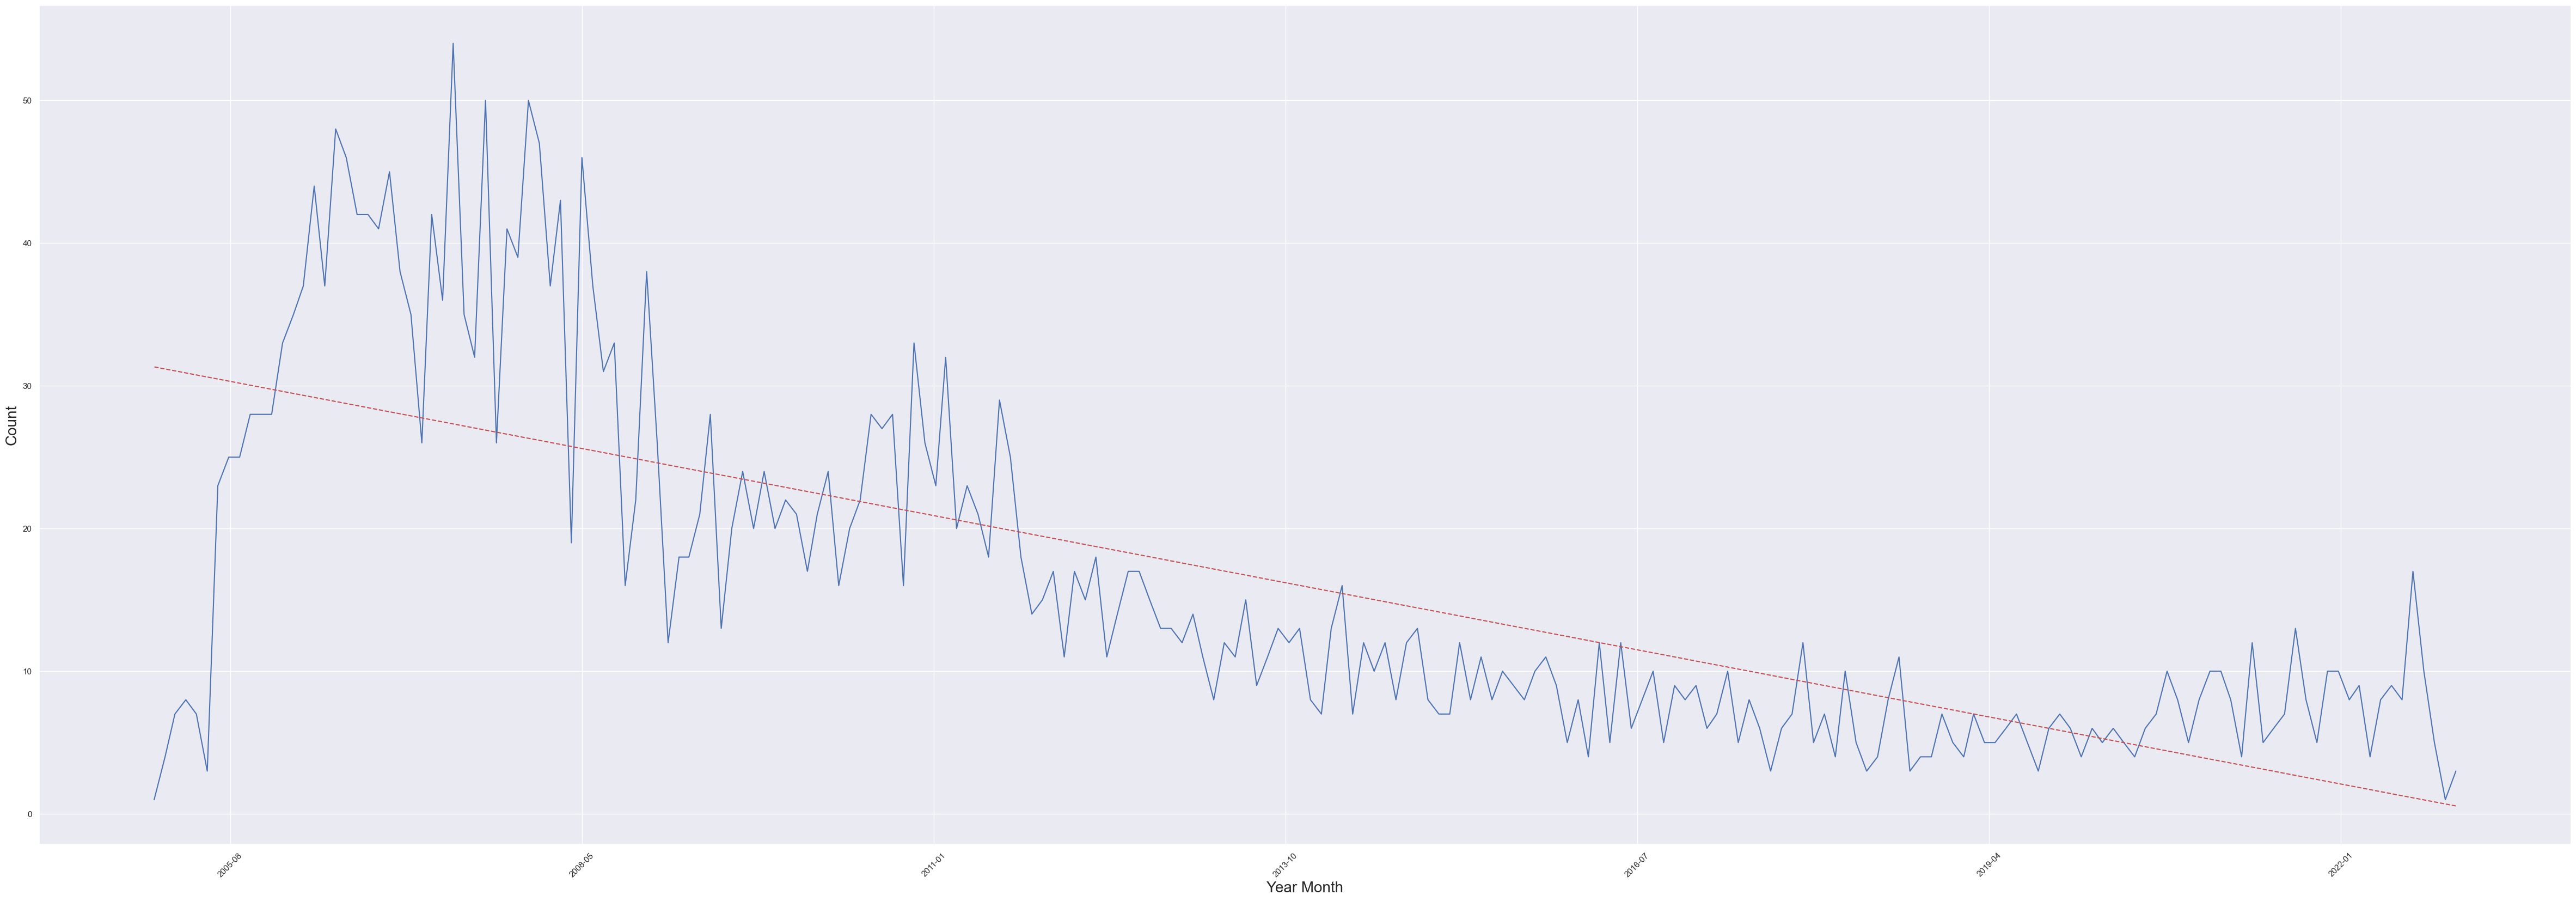

In [36]:
def grp_c_plot(df5, port):
    # 1. Initialize variables to keep track of the year, port count, and dataframe of the specified port
    xAxis = []
    yAxis = []
    port_df = df5[df5["POD_ID"] == port]

    # 2. Group the data by year and get the unique years
    year_groups = port_df.groupby(df5['ETD_POL_D'].dt.strftime('%Y-%m'))
    print(year_groups)
    unique_years = year_groups.groups.keys()

    # 3. Loop through the unique years and get the port count for each year
    for year in unique_years:
        year_df = year_groups.get_group(year)
        xAxis.append(year)
        yAxis.append(len(year_df))

    # 4. Reverse the x and y axis lists to plot the data in chronological order
    xAxis.reverse()  # Date
    yAxis.reverse()  # Count

    # 5Convert the year strings to dates for the x axis
    xAxis = mdates.date2num(xAxis)

    # 6. Calculate and plot the trendline
    z = np.polyfit(xAxis, yAxis, 1)

    # 7Entries
    p_entries = str(len(list(zip(xAxis, yAxis))))

    # Print statements to show brief
    print("The total number of entries " +
          p_entries + " for " + port + ".")
    print("The gradient of the trendline is " + str(z[0]) + ".")

    # 8Plot the graph
    fig, ax = plt.subplots(figsize=(60, 20), linewidth=5)
    ax.plot(xAxis, yAxis)

    # 9Graph Settings
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    plt.xticks(rotation=45)
    plt.xlabel("Year Month", fontsize=20)
    plt.ylabel("Count", fontsize=20)

    # 10Plot trendline on to graph
    p = np.poly1d(z)
    plt.plot(xAxis, p(xAxis), "r--")


# for ports in port_id[count_sort_ind]:
#     grp_c_plot(df5,ports)

grp_c_plot(df5, 'AEDXB')


In [37]:
# grp_c_plot(df5,'AEDXB')


In [38]:
# grp_c_plot(df5,'THBKK')


In [39]:
# grp_c_plot(df5,'NZAKL')
